In [1]:
# https://www.kaggle.com/c/plant-seedlings-classification/data
from fastai import *
from fastai.vision import *
%matplotlib inline

In [2]:
path = Path('data')

In [9]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=64, size=128, ds_tfms=get_transforms(flip_vert=True))

In [10]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

In [74]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


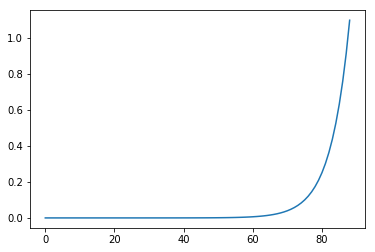

In [75]:
learn.recorder.plot_lr()

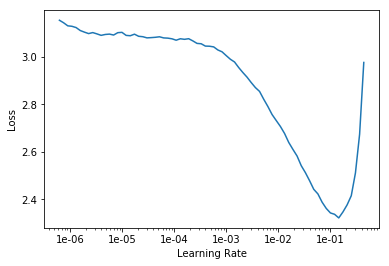

In [76]:
learn.recorder.plot()

In [77]:
learn.fit(4, lr=1e-2)

Total time: 01:28
epoch  train_loss  valid_loss  error_rate  accuracy
1      1.108755    0.724842    0.243000    0.757000  (00:22)
2      0.747450    0.530503    0.191000    0.809000  (00:21)
3      0.562150    0.493416    0.180000    0.820000  (00:22)
4      0.490414    0.479334    0.178000    0.822000  (00:21)



In [78]:
learn.save('4epochs')

In [79]:
learn.fit(4, lr=1e-2)

Total time: 01:25
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.518945    0.492775    0.187000    0.813000  (00:20)
2      0.429652    0.608283    0.198000    0.802000  (00:21)
3      0.434286    0.444560    0.158000    0.842000  (00:21)
4      0.404001    0.381277    0.155000    0.845000  (00:21)



In [80]:
learn.save('8epochs')

In [81]:
learn.fit(4, lr=1e-2)

Total time: 01:25
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.368964    0.615301    0.202000    0.798000  (00:21)
2      0.342517    0.485666    0.148000    0.852000  (00:21)
3      0.351892    0.458407    0.141000    0.859000  (00:21)
4      0.337552    0.440164    0.156000    0.844000  (00:21)



In [83]:
learn.load('8epochs')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f0e5a8b9278>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [84]:
learn.fit_one_cycle(4, max_lr=1e-2/5)

Total time: 01:27
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.267858    0.217836    0.078000    0.922000  (00:21)
2      0.231381    0.212781    0.078000    0.922000  (00:21)
3      0.213516    0.190196    0.071000    0.929000  (00:22)
4      0.202165    0.189253    0.070000    0.930000  (00:21)



In [85]:
learn.save('12epochs')

In [86]:
learn.fit_one_cycle(4, max_lr=1e-2/10)

Total time: 01:26
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.204942    0.195038    0.070000    0.930000  (00:20)
2      0.197465    0.183409    0.068000    0.932000  (00:21)
3      0.193535    0.179568    0.066000    0.934000  (00:22)
4      0.188125    0.179385    0.066000    0.934000  (00:21)



In [87]:
learn.save('16epochs')

In [88]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


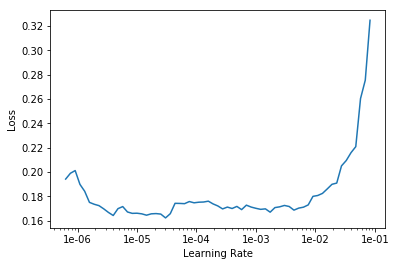

In [89]:
learn.recorder.plot()

In [90]:
learn.fit_one_cycle(4, max_lr=1e-4)

Total time: 01:25
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.201798    0.177089    0.067000    0.933000  (00:20)
2      0.191750    0.178897    0.066000    0.934000  (00:21)
3      0.185138    0.177688    0.067000    0.933000  (00:21)
4      0.184276    0.177773    0.067000    0.933000  (00:21)



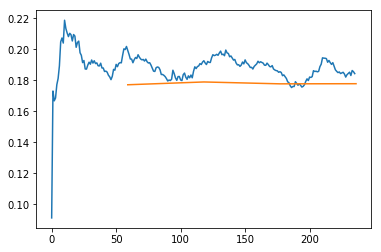

In [91]:
learn.recorder.plot_losses()

In [93]:
learn.fit_one_cycle(6, max_lr=1e-4/5)

Total time: 02:08
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.181267    0.178955    0.067000    0.933000  (00:21)
2      0.172810    0.174840    0.069000    0.931000  (00:21)
3      0.183216    0.176768    0.066000    0.934000  (00:21)
4      0.176687    0.177861    0.065000    0.935000  (00:21)
5      0.174326    0.175149    0.066000    0.934000  (00:21)
6      0.171712    0.177502    0.067000    0.933000  (00:21)



In [94]:
learn.save('stage-1')

In [95]:
learn.unfreeze()
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


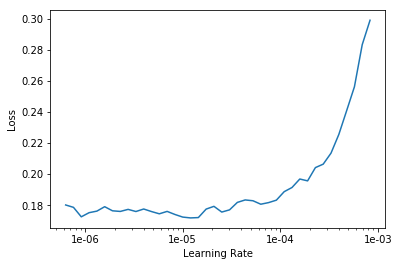

In [96]:
learn.recorder.plot()

In [97]:
learn.fit_one_cycle(4, max_lr=slice(1e-7, 1e-6))

Total time: 01:30
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.177577    0.175910    0.068000    0.932000  (00:22)
2      0.179342    0.175767    0.066000    0.934000  (00:22)
3      0.177550    0.175564    0.065000    0.935000  (00:23)
4      0.175312    0.178471    0.068000    0.932000  (00:22)



In [98]:
learn.fit_one_cycle(4, max_lr=slice(1e-9, 1e-7))

Total time: 01:30
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.174967    0.177340    0.068000    0.932000  (00:22)
2      0.174480    0.175609    0.072000    0.928000  (00:22)
3      0.178051    0.177616    0.067000    0.933000  (00:22)
4      0.190312    0.178429    0.070000    0.930000  (00:22)



In [99]:
learn.save('stage-2')

In [101]:
data2 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms(flip_vert=True))

In [102]:
learn.data = data2

In [103]:
learn.freeze()

In [104]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


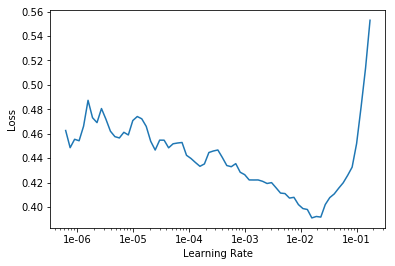

In [105]:
learn.recorder.plot()

In [106]:
learn.fit_one_cycle(10, max_lr=1e-2/5)

Total time: 05:47
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.325982    0.151167    0.056842    0.943158  (00:36)
2      0.247428    0.138751    0.055789    0.944211  (00:34)
3      0.217945    0.153140    0.061053    0.938947  (00:35)
4      0.202114    0.115064    0.046316    0.953684  (00:34)
5      0.191249    0.124751    0.050526    0.949474  (00:34)
6      0.175829    0.106437    0.040000    0.960000  (00:34)
7      0.163487    0.092747    0.038947    0.961053  (00:34)
8      0.153009    0.100830    0.041053    0.958947  (00:34)
9      0.153708    0.091871    0.040000    0.960000  (00:34)
10     0.144124    0.091713    0.041053    0.958947  (00:34)



In [107]:
learn.save('10_224')

In [108]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


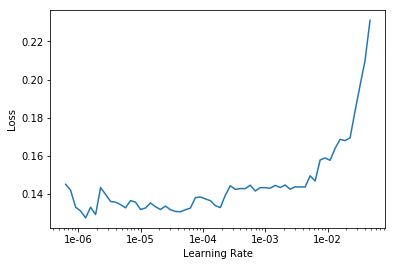

In [109]:
learn.recorder.plot()

In [110]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

Total time: 02:53
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.126774    0.094652    0.038947    0.961053  (00:34)
2      0.131949    0.091381    0.040000    0.960000  (00:35)
3      0.138803    0.095137    0.043158    0.956842  (00:35)
4      0.132404    0.091619    0.041053    0.958947  (00:34)
5      0.145243    0.092983    0.043158    0.956842  (00:34)



In [111]:
learn.fit_one_cycle(5, max_lr=slice(1e-8, 1e-6))

Total time: 02:52
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.135236    0.092761    0.041053    0.958947  (00:33)
2      0.143747    0.092983    0.044211    0.955789  (00:34)
3      0.141904    0.091678    0.042105    0.957895  (00:34)
4      0.140522    0.089934    0.036842    0.963158  (00:35)
5      0.140856    0.092035    0.038947    0.961053  (00:34)



In [112]:
learn.fit_one_cycle(5, max_lr=slice(1e-10, 1e-8))

Total time: 02:52
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.137738    0.092251    0.043158    0.956842  (00:33)
2      0.139761    0.092240    0.042105    0.957895  (00:35)
3      0.132127    0.092723    0.041053    0.958947  (00:34)
4      0.140856    0.090842    0.037895    0.962105  (00:34)
5      0.134670    0.091023    0.038947    0.961053  (00:34)



In [113]:
learn.save('25_225')

In [114]:
learn.unfreeze()

In [115]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


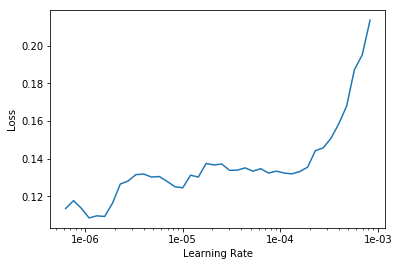

In [116]:
learn.recorder.plot()

In [117]:
learn.lr_find(1e-11, 1e-4)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


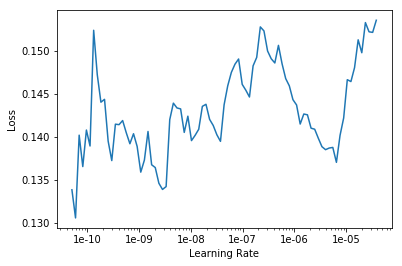

In [118]:
learn.recorder.plot()

In [119]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

Total time: 03:41
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.135894    0.090767    0.038947    0.961053  (00:43)
2      0.129054    0.091940    0.037895    0.962105  (00:44)
3      0.130658    0.097433    0.041053    0.958947  (00:44)
4      0.123034    0.089897    0.036842    0.963158  (00:44)
5      0.126366    0.090749    0.040000    0.960000  (00:44)



In [120]:
learn.fit_one_cycle(5, max_lr=slice(1e-8, 1e-6))

Total time: 03:43
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.123286    0.089481    0.035789    0.964211  (00:44)
2      0.149732    0.088359    0.036842    0.963158  (00:44)
3      0.151798    0.088861    0.035789    0.964211  (00:44)
4      0.134761    0.089108    0.032632    0.967368  (00:44)
5      0.133951    0.089525    0.041053    0.958947  (00:44)



In [121]:
learn.save('224_stage-2')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


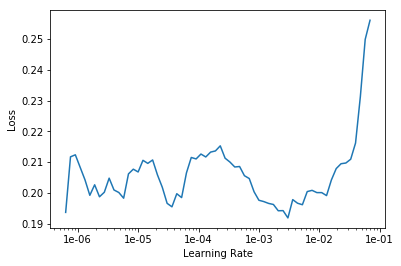

In [122]:
data3 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=64, size=299, ds_tfms=get_transforms(flip_vert=True))
learn.data = data3
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [123]:
learn.fit_one_cycle(5, max_lr=1e-3)

Total time: 05:04
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.177988    0.105622    0.031590    0.968410  (01:03)
2      0.155701    0.116419    0.041394    0.958606  (01:00)
3      0.149492    0.106405    0.037037    0.962963  (00:59)
4      0.142592    0.101099    0.038126    0.961874  (01:00)
5      0.135016    0.103152    0.038126    0.961874  (01:00)



In [124]:
learn.fit_one_cycle(5, max_lr=1e-3/100)

Total time: 05:01
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.129225    0.100850    0.034858    0.965142  (01:00)
2      0.133863    0.101815    0.038126    0.961874  (01:00)
3      0.129552    0.101573    0.040305    0.959695  (01:00)
4      0.134957    0.101587    0.037037    0.962963  (01:00)
5      0.141832    0.099470    0.033769    0.966231  (01:00)



LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


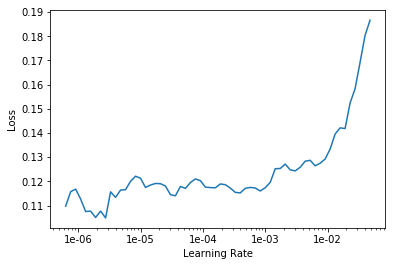

In [125]:
learn.lr_find()
learn.recorder.plot()

In [126]:
learn.fit_one_cycle(5, max_lr=1e-6)

Total time: 05:03
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.136778    0.101662    0.039216    0.960784  (01:01)
2      0.129914    0.099200    0.032680    0.967320  (01:00)
3      0.129799    0.099200    0.035948    0.964052  (01:00)
4      0.132762    0.100719    0.037037    0.962963  (01:00)
5      0.141069    0.100239    0.035948    0.964052  (00:59)



In [127]:
learn.unfreeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


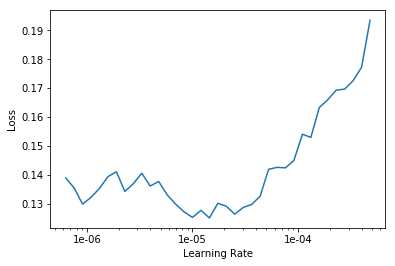

In [128]:
learn.lr_find()
learn.recorder.plot()

In [129]:
learn.fit_one_cycle(6, max_lr=slice(1e-6, 1e-5))

Total time: 07:57
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.124815    0.098122    0.033769    0.966231  (01:20)
2      0.137073    0.096870    0.033769    0.966231  (01:19)
3      0.136675    0.099425    0.034858    0.965142  (01:19)
4      0.127992    0.095984    0.039216    0.960784  (01:19)
5      0.126727    0.095956    0.033769    0.966231  (01:19)
6      0.127051    0.096674    0.038126    0.961874  (01:19)



In [130]:
learn.save('299-unfreeze')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


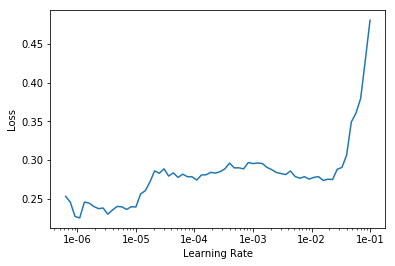

In [131]:
data4 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=32, size=384, ds_tfms=get_transforms(flip_vert=True))
learn.data = data4
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [132]:
learn.fit_one_cycle(4, 1e-6)

Total time: 05:22
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.353916    0.097692    0.033120    0.966880  (01:22)
2      0.253657    0.090329    0.034188    0.965812  (01:19)
3      0.270753    0.093683    0.036325    0.963675  (01:20)
4      0.270304    0.088549    0.034188    0.965812  (01:20)



In [133]:
learn.save('384-freeze')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


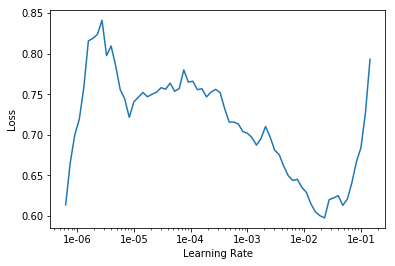

In [134]:
data5 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=24, size=512, ds_tfms=get_transforms(flip_vert=True))
learn.data = data5
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [135]:
learn.fit_one_cycle(4, 1e-3*5)

Total time: 09:42
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.396853    0.394527    0.128855    0.871145  (02:31)
2      0.381260    0.149761    0.053965    0.946035  (02:23)
3      0.238472    0.114894    0.040749    0.959251  (02:23)
4      0.254897    0.113692    0.041850    0.958150  (02:23)



In [136]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


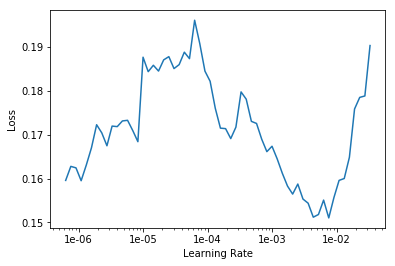

In [137]:
learn.recorder.plot()

In [138]:
learn.fit_one_cycle(8, max_lr=slice(1e-4, 1e-2/5))

Total time: 19:08
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.176859    0.101655    0.037445    0.962555  (02:23)
2      0.255365    0.110015    0.033040    0.966960  (02:23)
3      0.220017    0.108086    0.037445    0.962555  (02:23)
4      0.152139    0.088120    0.030837    0.969163  (02:23)
5      0.177405    0.076258    0.026432    0.973568  (02:24)
6      0.178595    0.083460    0.028634    0.971366  (02:23)
7      0.161512    0.077338    0.025330    0.974670  (02:23)
8      0.205279    0.076480    0.023128    0.976872  (02:23)



In [139]:
learn.save("freeze-512")

In [140]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


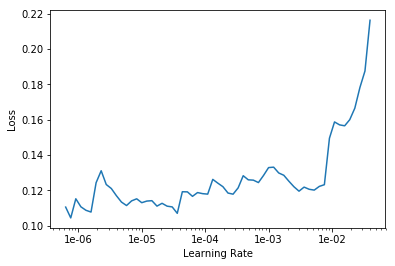

In [141]:
learn.recorder.plot()

In [142]:
learn.fit_one_cycle(8, max_lr=slice(1e-6*5, 1e-4/5))

Total time: 19:06
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.216713    0.074865    0.027533    0.972467  (02:23)
2      0.186649    0.080574    0.027533    0.972467  (02:23)
3      0.156293    0.076770    0.024229    0.975771  (02:23)
4      0.221137    0.078769    0.024229    0.975771  (02:22)
5      0.139042    0.077821    0.025330    0.974670  (02:23)
6      0.164031    0.079622    0.024229    0.975771  (02:22)
7      0.136681    0.075515    0.024229    0.975771  (02:23)
8      0.152462    0.081307    0.026432    0.973568  (02:23)



In [143]:
learn.unfreeze()
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


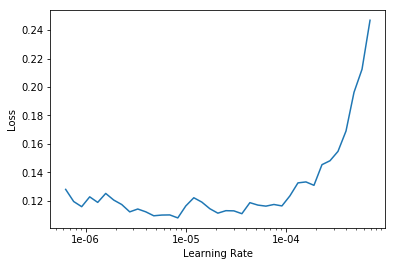

In [144]:
learn.recorder.plot()

In [146]:
learn.fit_one_cycle(6, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.131161,0.081845,0.028634,0.971366
2,0.182398,0.076682,0.023128,0.976872
3,0.129697,0.077450,0.026432,0.973568
4,0.142020,0.080941,0.026432,0.973568


KeyboardInterrupt: 

In [73]:
tmp_data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.1, test='test', bs=64, size=512, 
                                      ds_tfms=get_transforms(flip_vert=True))
tmp_learn = create_cnn(tmp_data, models.resnet34, metrics=error_rate)
tmp_learn.load('freeze-512')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f1fb9cdb780>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [83]:
len(tmp_data.test_ds)

794

In [91]:
preds = tmp_learn.get_preds(DatasetType.Test)

In [92]:
len(preds[0])

794

In [96]:
class_guess = preds[0].argmax(dim=1)

In [105]:
d = dict()
for f, g in zip((path / 'test').ls(), class_guess):
    d[f.name] = tmp_data.classes[g]
len(d)

794

In [114]:
df = pd.DataFrame(list(d.items()), columns=['file', 'species'])

In [117]:
df.to_csv('resnet34_freeze-512.csv', index=False)